# 1- Data Tidying:
## Submitted By : Aagnay Kariyal
## Student ID: 8830232
## **Part I**
### **Tuberculosis Dataset** 
This dataset outlines the number of tuberculosis patients in different countries in the year 2000.<br>
Dataset name: tb-raw.csv <br>
A few notes on the raw data set:<br>

- The columns starting with "m" or "f" contain multiple variables:  
    - Sex ("m" or "f")
    - Age Group ("0-14","15-24", "25-34", "45-54", "55-64", "65", "unknown")
- Mixture of 0s and missing values("NaN"). This is due to the data collection process and the distinction is important for this dataset.


#### Task: Apply Data Tidying techniques to get a tidier dataset with more representive columns, please do it step-by-step and explain each step you are doing.

In [16]:
# Importing all the dependencies for the entire code
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Loading the dataset into a pandas dataframe
data_tb = pd.read_csv('/Users/aagnaykariyal/Documents/Github/Conestoga/Machine Learning Programming/CSVs/tb-raw.csv')
data_tb # Checking the dataset

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014
0,AD,2000,0.0,0.0,1.0,0.0,0,0,0.0,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5,12,10.0,NaN,3.0
2,AF,2000,52.0,228.0,183.0,149.0,129,94,80.0,NaN,93.0
3,AG,2000,0.0,0.0,0.0,0.0,0,0,1.0,NaN,1.0
4,AL,2000,2.0,19.0,21.0,14.0,24,19,16.0,NaN,3.0
5,AM,2000,2.0,152.0,130.0,131.0,63,26,21.0,NaN,1.0
6,AN,2000,0.0,0.0,1.0,2.0,0,0,0.0,NaN,0.0
7,AO,2000,186.0,999.0,1003.0,912.0,482,312,194.0,NaN,247.0
8,AR,2000,97.0,278.0,594.0,402.0,419,368,330.0,NaN,121.0
9,AS,2000,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN


In [2]:
print(data_tb['mu'].unique()) # Checking for all the unique values in 'mu' column
print(data_tb['year'].unique()) # Checking for all the unique values in 'year' column
data_tb = data_tb.drop(['mu','year'], axis='columns') # Since the 'mu' column just consist of null values, and 'year' has just one value, we're dropping those columns
data_tb = data_tb.drop(index=9) # Here we drop the final row as well since it mostly consisted of null values and two counts which was very low that wouldn't have affected the dataset as much
data_tb # Checking the cleaned dataset

[nan]
[2000]


,country,m014,m1524,m2534,m3544,m4554,m5564,m65,f014
0,AD,0.0,0.0,1.0,0.0,0,0,0.0,NaN
1,AE,2.0,4.0,4.0,6.0,5,12,10.0,3.0
2,AF,52.0,228.0,183.0,149.0,129,94,80.0,93.0
3,AG,0.0,0.0,0.0,0.0,0,0,1.0,1.0
4,AL,2.0,19.0,21.0,14.0,24,19,16.0,3.0
5,AM,2.0,152.0,130.0,131.0,63,26,21.0,1.0
6,AN,0.0,0.0,1.0,2.0,0,0,0.0,0.0
7,AO,186.0,999.0,1003.0,912.0,482,312,194.0,247.0
8,AR,97.0,278.0,594.0,402.0,419,368,330.0,121.0


In [3]:
data_tb_tidy = pd.melt(data_tb, id_vars=['country'], value_name="Patient Count", var_name='Age Range') # Here we are grouping the columns by the column names into a single column called age range and the corresponding values into a different column called Patient Count.
data_tb_tidy['Gender'] = data_tb_tidy['Age Range'].astype('str').str[0] # Here we are taking the first letter of the string from the Age Range column to create a new column called gender.
data_tb_tidy['Age Range'] = data_tb_tidy['Age Range'].str.extract('(\d+)', expand=False) # In this line of code we tidy the data by just considering the integer values in the table
data_tb_tidy['Gender'] = data_tb_tidy['Gender'].str.replace('m', 'Male') # Converting the string 'm' into 'male' in the Gender column
data_tb_tidy['Gender'] = data_tb_tidy['Gender'].str.replace('f', 'Female') # Converting the string 'f' into 'female' in the Gender column
data_tb_tidy['Age Range'] = data_tb_tidy['Age Range'].astype('str').str[:-2] + "-" + data_tb_tidy['Age Range'].astype('str').str[-2:] # Here we are replacing the datatype into a string so that we can get the final two values to gather the last number in range to add a hyphen in-front as we add the rest of the string to the beginning to get a clean age range
data_tb_tidy.replace('-65', '65', inplace=True) # We are tidying up all the values that just consisted of a single age range instead of two since a hyphen was added in-front from the previous line of code
print(data_tb_tidy.isnull().sum()) # Here we check for any null values
data_tb_tidy.fillna(value=0, inplace=True) # As there is only a single null value we change that value into 0 as it is the most common value according to the country AD
data_tb_tidy['Patient Count'] = data_tb_tidy['Patient Count'].astype(int) # Tidy the column by changing the dataset from float into int
print(data_tb_tidy) # printing the cleaned dataset

country          0
Age Range        0
Patient Count    1
Gender           0
dtype: int64
   country Age Range  Patient Count  Gender
0       AD      0-14              0    Male
1       AE      0-14              2    Male
2       AF      0-14             52    Male
3       AG      0-14              0    Male
4       AL      0-14              2    Male
..     ...       ...            ...     ...
67      AL      0-14              3  Female
68      AM      0-14              1  Female
69      AN      0-14              0  Female
70      AO      0-14            247  Female
71      AR      0-14            121  Female

[72 rows x 4 columns]


## **Part II**

Observe the following dataset: ./CSVs/salesMinimized.csv 
Please observe columns thoroughly as you need to apply some common-sense to represent the columns correctly.

#### Task: Apply Data Tidying techniques to get a tidier dataset with more representive columns, please do it step-by-step and explain each step you are doing.


In [4]:
# Reading the dataset into a dataframe
data_sm = pd.read_csv('/Users/aagnaykariyal/Documents/Github/Conestoga/Machine Learning Programming/CSVs/salesMinimized.csv')
print(data_sm.head()) # Checking the dataset
# Finding the unique values
print('dept id: \n',data_sm['dept_id'].unique())
print('item id: \n',data_sm['item_id'].unique())
print('id: \n',data_sm['id'].unique())
print('cat_id: \n',data_sm['cat_id'].unique())
print('store_id \n',data_sm['store_id'].unique())
print('state id: \n',data_sm['state_id'].unique())
# Dropping unnecessary columns
data_sm = data_sm.drop(['store_id','state_id','id', 'Unnamed: 0'], axis = 'columns') 
""" Store id and state id just have one value and id is a combination of values from other columns, and Unnamed: 0 is an index but we already have an index within the dataframe. So we are dropping these 4 columns """

   Unnamed: 0                             id        item_id    dept_id  \
0           0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1   
1           1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1   
2           2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1   
3           3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1   
4           4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1   

    cat_id store_id state_id  d_1  d_2  d_3  ...  d_61  d_62  d_63  d_64  \
0  HOBBIES     CA_1       CA    0    0    0  ...     0     0     0     0   
1  HOBBIES     CA_1       CA    0    0    0  ...     0     0     0     0   
2  HOBBIES     CA_1       CA    0    0    0  ...     0     0     0     0   
3  HOBBIES     CA_1       CA    0    0    0  ...     1     0     0     0   
4  HOBBIES     CA_1       CA    0    0    0  ...     0     0     0     0   

   d_65  d_66  d_67  d_68  d_69  d_70  
0     0     0     0     0     0     0  
1     0     0     

' Store id and state id just have one value and id is a combination of values from other columns, and Unnamed: 0 is an index but we already have an index within the dataframe. So we are dropping these 4 columns '

In [5]:
# Cleaning the columns 'item_id' and 'dept_id' by only taking in the numbers which are unique and identifiable
data_sm['item_id'] = data_sm['item_id'].astype('str').str[-3:]
data_sm['dept_id'] = data_sm['dept_id'].astype(str).str[-1:]
data_sm # Checking the cleaned dataset

,item_id,dept_id,cat_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,...,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70
0,001,1,HOBBIES,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,002,1,HOBBIES,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,003,1,HOBBIES,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,004,1,HOBBIES,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,005,1,HOBBIES,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,169,2,FOODS,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,170,2,FOODS,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,171,2,FOODS,4,5,1,3,3,2,0,...,1,0,1,1,0,2,2,1,1,6
1998,172,2,FOODS,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_sm_tidy = pd.melt(data_sm, id_vars=['item_id', 'dept_id', 'cat_id'], value_name='Sale Count', var_name='Day Number') # Grouping most of the columns by putting the column names into a new column called 'Day Number' while putting in the values into a column named 'Sale Count'
data_sm_tidy['Day Number'] = data_sm_tidy['Day Number'].str.extract('(\d+)', expand = False) # Extracting just the integer value from the cells to get a cleaner version of the column
print(data_sm_tidy) # Printing the cleaned dataset

       item_id dept_id   cat_id Day Number  Sale Count
0          001       1  HOBBIES          1           0
1          002       1  HOBBIES          1           0
2          003       1  HOBBIES          1           0
3          004       1  HOBBIES          1           0
4          005       1  HOBBIES          1           0
...        ...     ...      ...        ...         ...
139995     169       2    FOODS         70           0
139996     170       2    FOODS         70           0
139997     171       2    FOODS         70           6
139998     172       2    FOODS         70           0
139999     173       2    FOODS         70           1

[140000 rows x 5 columns]


In [7]:
print(data_sm_tidy.isnull().sum()) # Looking for any null values

item_id       0
dept_id       0
cat_id        0
Day Number    0
Sale Count    0
dtype: int64


## PART III
Using Boston House pricing dataset, apply outlier detection techniques discussed in class to detect outliers. Use different techniques and comment your code. <br>
You need to check how to load the dataset correctly! <br>
1. You should include some Visualization techniques
2. You should include some statistical approaches
3. You should analyze your attributes using Univariant and multivariant outlier detection techniques.
4. Choose one or more of your outlier detection techniques and remove outliers

### Importing and Cleaning the dataset

In [29]:
# Importing the dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
# Loading the dataset into a dataframe
data_bh = pd.read_csv(data_url, skiprows = 21, header = None, sep = '\s+')
data_bh # Checking the imported data

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [30]:
# Creating 3 lists to append the values from the first three columns corresponding to the null values
list_1 = []
list_2 = []
list_3 = []
value_dict = {0:list_1, 1:list_2, 2:list_3} # Creating a dictionary for a for loop to iterate through
# for loop to gather the values we need for the final 3 columns
for keys in value_dict:
    values = value_dict[keys]
    condition = data_bh[6].isnull()
    values.append(data_bh.loc[condition, keys].reset_index(drop = True))

In [31]:
data_bh.columns = ['CRIM', 'ZM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'] # Here we insert the column names for headers
data_bh = data_bh.dropna().reset_index(drop = True) # Here we remove all the rows that consists of null values
data_bh # Checking for the cleaned dataset

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0


In [32]:
# Here we insert back all the values that we have gathered corresponding to the null values from the first three columns
data_bh['B'] = list_1[0]
data_bh['LSTAT'] = list_2[0]
data_bh['MEDV'] = list_3[0]
data_bh # Checking the dataset for the inserted values

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Boxplot

<Axes: ylabel='LSTAT'>

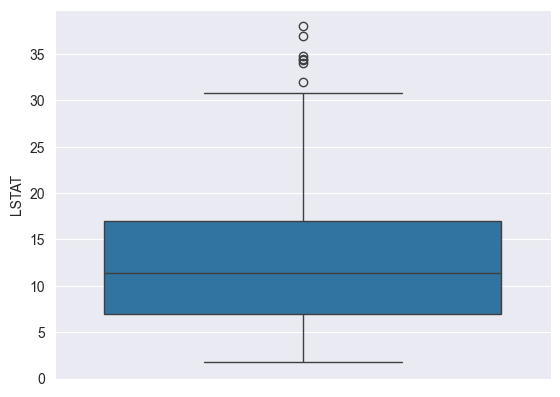

In [12]:
sns.boxplot(data_bh['LSTAT']) # Creating a boxplot to check for outliers in the LSTAT column

In [13]:
# Removing outliers using the IQR method
Q1 = data_bh['LSTAT'].quantile(0.25) # Getting the 25th percentile or the 1st quartile
Q3 = data_bh['LSTAT'].quantile(0.75) # Getting the 75th percentile or the 3rd quartile
IQR = Q3 - Q1 # Calculating the Inter-quartile Range

upper = Q3+(1.5*IQR) # Upper Bound
lower = Q1-(1.5*IQR) # Lowe Bound
print(f'Upper value: {upper}, lower value: {lower}') # Printing to see the first and last whisker values of the box-plot
upper_values = np.array(data_bh['LSTAT'] >= upper) # Getting all the values that are above the upper bound
lower_values = np.array(data_bh['LSTAT'] <= lower) # Getting all the values that are below the lower bound
# Creating two arrays that consists of boolean values indicating the outlier rows
upper_values = np.where(data_bh['LSTAT'] >= upper)[0]
lower_values = np.where(data_bh['LSTAT'] <= lower)[0]

print('Shape before removing outliers:', data_bh.shape) # Printing the first shape of the dataframe

data_bh_copy = data_bh.copy() # Creating a new dataframe with the same values
# Removing the outliers
data_bh_copy.drop(index=upper_values, inplace=True)
data_bh_copy.drop(index=lower_values, inplace=True)
print('Shape after removing outliers:', data_bh_copy.shape) # Printing out the new shape after removing the outliers


Upper value: 31.962500000000006, lower value: -8.057500000000005
Shape before removing outliers: (506, 14)
Shape after removing outliers: (499, 14)


### Scatter Plot

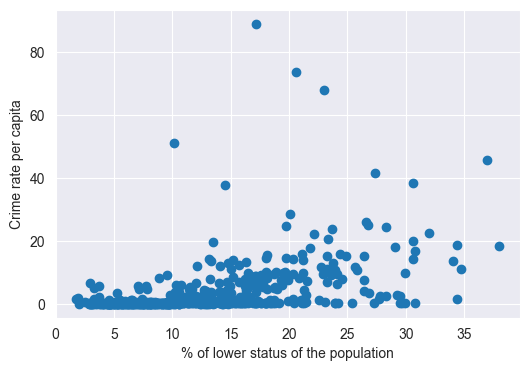

In [14]:
# Creating a scatterplot to get an insight into the data 
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(data_bh['LSTAT'], data_bh['CRIM'])

ax.set_xlabel('% of lower status of the population') # Labelling the x-axis
ax.set_ylabel('Crime rate per capita') # Labelling the y-axis
plt.show()

In [24]:
# Getting the positions of the outliers
print(np.where((data_bh['LSTAT']<25) & (data_bh['CRIM']>30))) # Printing out the positions of the outliers
ind = np.where((data_bh['LSTAT']<25) & (data_bh['CRIM']>30)) # Inserting all those values into an array
data_bh_copy2 = data_bh.copy() # Creating a new dataset to remove the outliers
data_bh_copy2.drop(index=ind[0], inplace=True) # Removing the outliers
print(f'Shape before deleting the outliers: {data_bh.shape}\nShape after deleting the outliers: {data_bh_copy2.shape}') # Printing out the shapes to see if the outliers have been removed

(array([380, 405, 410, 418, 427]),)
Shape before deleting the outliers: (506, 14)
Shape after deleting the outliers: (501, 14)


### Z-Score

In [26]:
z = np.abs(stats.zscore(data_bh['AGE'])) # Creates a numpy array consisting the z-scores of all values
print(np.where(z > 2)) # Prints out an array with the positions of the outlier with the threshold as 2
values_to_remove = np.where(z > 2)[0] # Inserting the outliers into an array
data_bh_copy3 = data_bh.copy() # Creating a new dataset to remove the outliers
data_bh_copy3.drop(index=values_to_remove, inplace=True) # Removing the outliers
print(f'Shape before deleting the outliers: {data_bh.shape}\nShape after removing the outliers: {data_bh_copy3.shape}') # Printing out the shapes to see if the outliers have been removed

(array([ 41,  42,  43,  70,  72,  73,  74, 193, 214, 243, 251, 252, 253,
       299]),)
Shape before deleting the outliers: (506, 14)
Shape after removing the outliers: (492, 14)


### Multivariate outlier detection using box-plots

<Axes: >

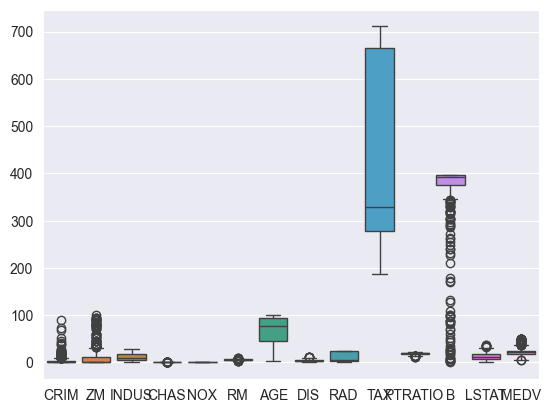

In [27]:
sns.boxplot(data_bh) # Printing out the box-plot to see the outliers across all variables in the dataframe